# Capstone project Notebook


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

#from sklearn.metrics import jaccard_similarity_score


%matplotlib inline


In [4]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2020-12-19 17:45:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2020-12-19 17:45:44 (139 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [5]:
df = pd.read_csv('loan_train.csv', delimiter=",")
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
#df.shape
df.dtypes
#df.describe()



Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [7]:
df['loan_status'].value_counts()
#df['education'].value_counts()
#df['Gender'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [8]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

df['week_day'] = df['effective_date'].dt.dayofweek

df['duration'] = abs(df['due_date'] - df['effective_date']).dt.days

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,week_day,duration
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,29
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,29
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,14
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,29
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,29


In [9]:
X = df[[ 'Gender','age','education','Principal', 'terms', 'week_day', 'duration']].values
X[0:5]

array([['male', 45, 'High School or Below', 1000, 30, 3, 29],
       ['female', 33, 'Bechalor', 1000, 30, 3, 29],
       ['male', 27, 'college', 1000, 15, 3, 14],
       ['female', 28, 'college', 1000, 30, 4, 29],
       ['male', 29, 'college', 1000, 30, 4, 29]], dtype=object)

In [10]:
from sklearn import preprocessing


le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['male','female'])
X[:,0] = le_Gender.transform(X[:,0])

le_education = preprocessing.LabelEncoder()
le_education.fit([ 'High School or Below', 'college', 'Bechalor' , 'Master or Above'])
X[:,2] = le_education.transform(X[:,2])


X[0:10]


array([[1, 45, 1, 1000, 30, 3, 29],
       [0, 33, 0, 1000, 30, 3, 29],
       [1, 27, 3, 1000, 15, 3, 14],
       [0, 28, 3, 1000, 30, 4, 29],
       [1, 29, 3, 1000, 30, 4, 29],
       [1, 36, 3, 1000, 30, 4, 29],
       [1, 28, 3, 1000, 30, 4, 29],
       [1, 26, 3, 800, 15, 5, 14],
       [1, 29, 3, 300, 7, 5, 6],
       [1, 39, 1, 1000, 15, 5, 29]], dtype=object)

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.42056004,  2.33152555, -0.64691859,  0.51578458,  0.92071769,
        -0.26122054,  0.53257725],
       [-2.37778177,  0.34170148, -1.5212695 ,  0.51578458,  0.92071769,
        -0.26122054,  0.53257725],
       [ 0.42056004, -0.65321055,  1.10178323,  0.51578458, -0.95911111,
        -0.26122054, -0.88417105],
       [-2.37778177, -0.48739188,  1.10178323,  0.51578458,  0.92071769,
         0.12175534,  0.53257725],
       [ 0.42056004, -0.3215732 ,  1.10178323,  0.51578458,  0.92071769,
         0.12175534,  0.53257725]])

In [14]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict
KNN_MODEL = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN_MODEL


KNeighborsClassifier(n_neighbors=4)

In [17]:
KNN_yhat = KNN_MODEL.predict(X_test)
KNN_yhat[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [18]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN_MODEL.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, KNN_yhat))


Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.6857142857142857


In [20]:
# Best k
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN_MODEL = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    KNN_yhat = KNN_MODEL.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(KNN_yhat==y_test);
    
    std_acc[n-1]=np.std(KNN_yhat==y_test)/np.sqrt(KNN_yhat.shape[0])
mean_acc

array([0.71428571, 0.65714286, 0.75714286, 0.68571429, 0.77142857,
       0.71428571, 0.77142857, 0.72857143, 0.7       ])

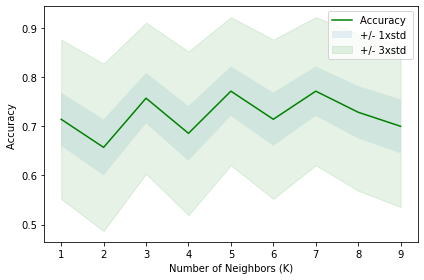

In [21]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc,alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc,alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [22]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.7714285714285715 with k= 5


In [26]:
#from sklearn.metrics import jaccard_similarity_score
knn_yhat = KNN_MODEL.predict(X_test)
#print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN F1-score: 0.69


# Decision Tree

In [35]:
DT_MODEL = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
DT_MODEL

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [36]:
DT_MODEL.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [37]:
predTree = DT_MODEL.predict(X_test)
predTree

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [38]:
print (predTree [0:5])
print (y_test [0:5])


['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [39]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.7714285714285715


In [40]:
DT_yhat = DT_MODEL.predict(X_test)
#print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT F1-score: 0.71


!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


dot_data = StringIO()
filename = "loan.png"
featureNames = X.columns[0:5]
targetNames = X["loan_status"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_train), filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


# SVM

In [41]:
from sklearn import svm
SVM_MODEL = svm.SVC(kernel='rbf')
SVM_MODEL.fit(X_train, y_train)


SVC()

In [42]:
SVM_yhat = SVM_MODEL.predict(X_test)
SVM_yhat [0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [44]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.12        15
     PAIDOFF       0.80      1.00      0.89        55

    accuracy                           0.80        70
   macro avg       0.90      0.53      0.51        70
weighted avg       0.84      0.80      0.72        70

Confusion matrix, without normalization
[[55  0]
 [14  1]]


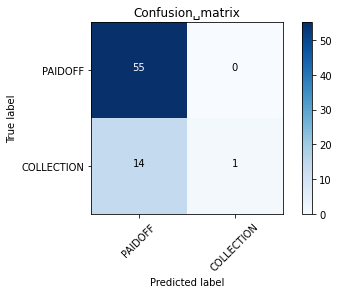

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, SVM_yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)
print (classification_report(y_test, SVM_yhat))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['PAIDOFF','COLLECTION'],normalize= False, title='Confusion␣matrix')


In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, SVM_yhat, average='weighted')

0.7237903225806451

In [ ]:
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, SVM_yhat)

In [ ]:
#SVM_MODEL2 = svm.SVC(kernel='linear')
#SVM_MODEL2.fit(X_train, y_train)
#SVM_yhat2 = SVM_MODEL2.predict(X_test)
#print("Avg F1-score: %.4f" % f1_score(y_test, SVM_yhat2, average='weighted'))
#print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, SVM_yhat2))

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [48]:
LR_yhat = LR.predict(X_test)
LR_yhat

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [49]:
LR_yhat_prob = LR.predict_proba(X_test)
LR_yhat_prob


array([[0.5 , 0.5 ],
       [0.44, 0.56],
       [0.29, 0.71],
       [0.34, 0.66],
       [0.32, 0.68],
       [0.3 , 0.7 ],
       [0.49, 0.51],
       [0.45, 0.55],
       [0.34, 0.66],
       [0.54, 0.46],
       [0.34, 0.66],
       [0.5 , 0.5 ],
       [0.24, 0.76],
       [0.34, 0.66],
       [0.42, 0.58],
       [0.24, 0.76],
       [0.52, 0.48],
       [0.29, 0.71],
       [0.45, 0.55],
       [0.37, 0.63],
       [0.45, 0.55],
       [0.5 , 0.5 ],
       [0.57, 0.43],
       [0.47, 0.53],
       [0.36, 0.64],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.36, 0.64],
       [0.51, 0.49],
       [0.26, 0.74],
       [0.46, 0.54],
       [0.52, 0.48],
       [0.43, 0.57],
       [0.49, 0.51],
       [0.39, 0.61],
       [0.47, 0.53],
       [0.51, 0.49],
       [0.29, 0.71],
       [0.45, 0.55],
       [0.47, 0.53],
       [0.48, 0.52],
       [0.31, 0.69],
       [0.43, 0.57],
       [0.51, 0.49],
       [0.31, 0.69],
       [0.51, 0.49],
       [0.46, 0.54],
       [0.5 ,

In [ ]:
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, LR_yhat)


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, LR_yhat, labels=['PAIDOFF','COLLECTION']))

[[44 11]
 [12  3]]


Confusion matrix, without normalization
[[44 11]
 [12  3]]


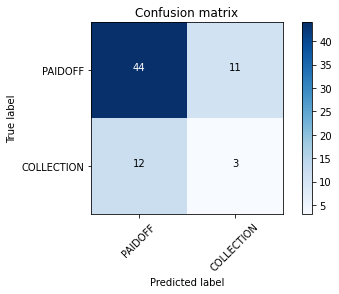

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LR_yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [52]:
print (classification_report(y_test, LR_yhat))

              precision    recall  f1-score   support

  COLLECTION       0.21      0.20      0.21        15
     PAIDOFF       0.79      0.80      0.79        55

    accuracy                           0.67        70
   macro avg       0.50      0.50      0.50        70
weighted avg       0.66      0.67      0.67        70



In [53]:
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )


LR F1-score: 0.67


In [54]:
from sklearn.metrics import log_loss
log_loss(y_test, LR_yhat_prob)

0.5750221846781389

In [ ]:
#LR1 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
#LR_yhat_prob2 = LR1.predict_proba(X_test)
#print ("LogLoss: : %.2f" % log_loss(y_test, LR_yhat_prob2))